![lop](../../images/logo_diive1_128px.png)

<span style='font-size:40px; display:block;'>
<b>
    Calculate percentiles 0-100 of series
</b>
</span>

---
**Notebook version**: `1` (23 Mar 2024)  
**Author**: Lukas Hörtnagl (holukas@ethz.ch)

</br>

# **Description**

- Simple function to calculate percentiles for input series.
- Does not convert all values to their percentile rank, but instead outputs percentiles 0, 1, 2, 3, ... 98, 99, 100, i.e., in total 101 values.
- In this example, the percentiles of half-hourly air temperature data (2013-2022) are calculated.

</br>

# **Imports**

In [1]:
import importlib.metadata
from datetime import datetime
import pandas as pd
import warnings
warnings.simplefilter("ignore", UserWarning)
from diive.configs.exampledata import load_exampledata_parquet
from diive.pkgs.analyses.quantiles import percentiles101
version_diive = importlib.metadata.version("diive")
print(f"diive version: v{version_diive}")

diive version: v0.74.0


In [2]:
help(percentiles101)

Help on function percentiles101 in module diive.pkgs.analyses.quantiles:

percentiles101(series: pandas.core.series.Series, showplot: bool = True, verbose: bool = True) -> pandas.core.frame.DataFrame
    Calculate percentiles 0-100 for series.
    
    Args:
        series: Input series.
        showplot: Shows plot of percentiles 0-100 if *True*.
        verbose: Prints some percentiles if *True*.
    
    Returns:
        Dataframe with percentiles 0-100 for *series*.
    
    - Example notebook available in:
        notebooks/Analyses/Percentiles.ipynb



</br>

# **Load example data**

In [3]:
df = load_exampledata_parquet()
series = df['Tair_f']
series

Loaded .parquet file L:\Sync\luhk_work\20 - CODING\21 - DIIVE\diive\diive\configs\exampledata\exampledata_PARQUET_CH-DAV_FP2022.5_2013-2022_ID20230206154316_30MIN.parquet (0.046 seconds). Detected time resolution of <30 * Minutes> / 30min 


TIMESTAMP_MIDDLE
2013-01-01 00:15:00   -1.618
2013-01-01 00:45:00   -1.630
2013-01-01 01:15:00   -1.644
2013-01-01 01:45:00   -1.657
2013-01-01 02:15:00   -0.567
                       ...  
2022-12-31 21:45:00    3.463
2022-12-31 22:15:00    5.283
2022-12-31 22:45:00    5.537
2022-12-31 23:15:00    4.963
2022-12-31 23:45:00    6.490
Freq: 30min, Name: Tair_f, Length: 175296, dtype: float64

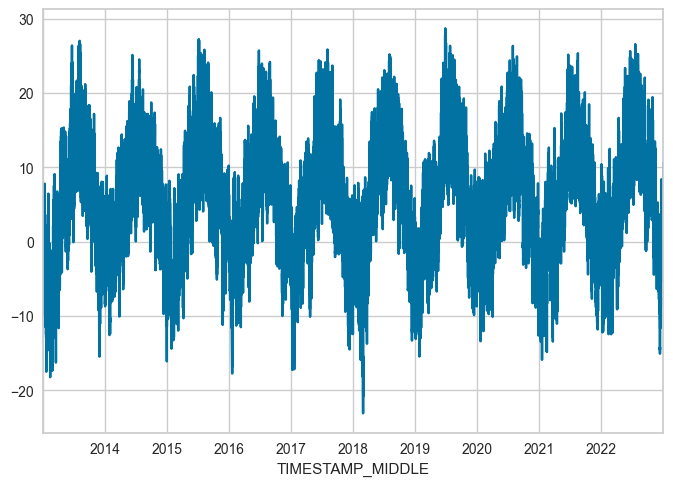

In [4]:
series.plot();

</br>

# **Calculate and plot percentile values**

Showing some percentiles for Tair_f:
     PERCENTILE    VALUE
0             0 -23.0960
1             1 -11.4902
5             5  -7.2570
16           16  -2.9670
25           25  -0.8000
50           50   4.6000
75           75  10.0670
84           84  12.3330
95           95  17.4830
99           99  22.0670
100         100  28.7130


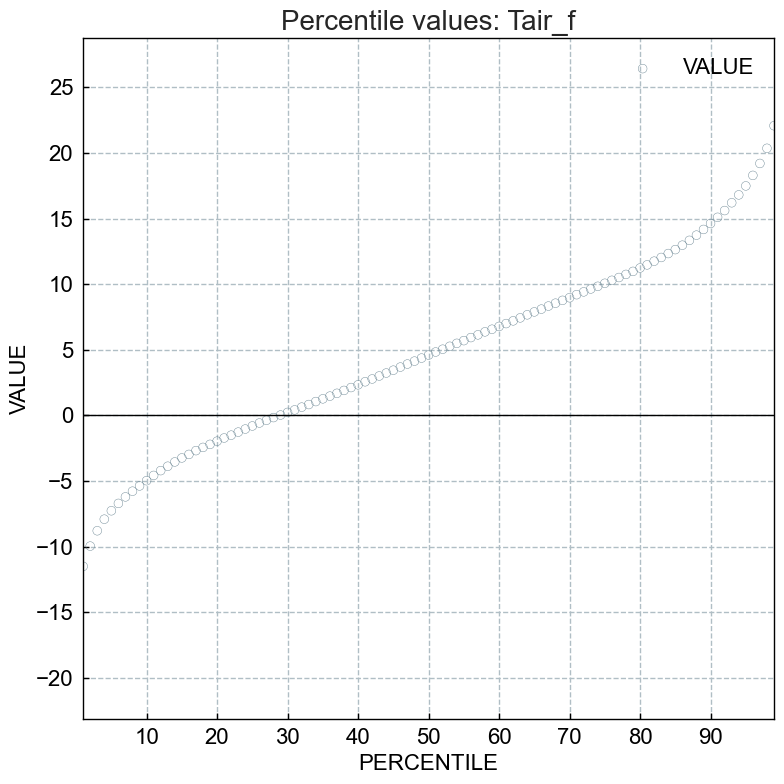

In [5]:
percentiles_df = percentiles101(series=df['Tair_f'], showplot=True, verbose=True)

In [6]:
percentiles_df

,PERCENTILE,VALUE
0,0,-23.09600
1,1,-11.49020
2,2,-9.94920
3,3,-8.78045
4,4,-7.90000
...,...,...
96,96,18.28400
97,97,19.19360
98,98,20.34730
99,99,22.06700


</br>

# **End of notebook**

In [7]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished {dt_string}")

Finished 2024-04-21 10:24:34
